In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Read the CSV files
rb85_data = pd.read_csv('OPT Data - Rubidium 85.csv')
rb87_data = pd.read_csv('OPT Data - Rubidium 87.csv')

rb85_data['Current (mA)'] = 1e2*rb85_data['Voltage (mV)']
rb85_data['Abs Current'] = np.abs(rb85_data['Current (mA)'])
rb85_data['Current Error'] = 1e2*rb85_data['Voltage Error']

rb87_data['Current (mA)'] = 1e2*rb87_data['Voltage (mV)']
rb87_data['Abs Current'] = np.abs(rb87_data['Current (mA)'])
rb87_data['Current Error'] = 1e2*rb87_data['Voltage Error']

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.Chi squared {85Rb, +} =31493.97480190644
Chi squared {85Rb, -} =270.3743884654675
Chi squared {87Rb, +} =2972.652619638943
Chi squared {87Rb, -} =117.66708803788629
Reduced Chi squared {85Rb, +} =2624.49790015887
Reduced Chi squared {85Rb, -} =22.53119903878896
Reduced Chi squared {87Rb, +} =247.7210516365786
Reduced Chi squared {87Rb, -} =9.805590669823857



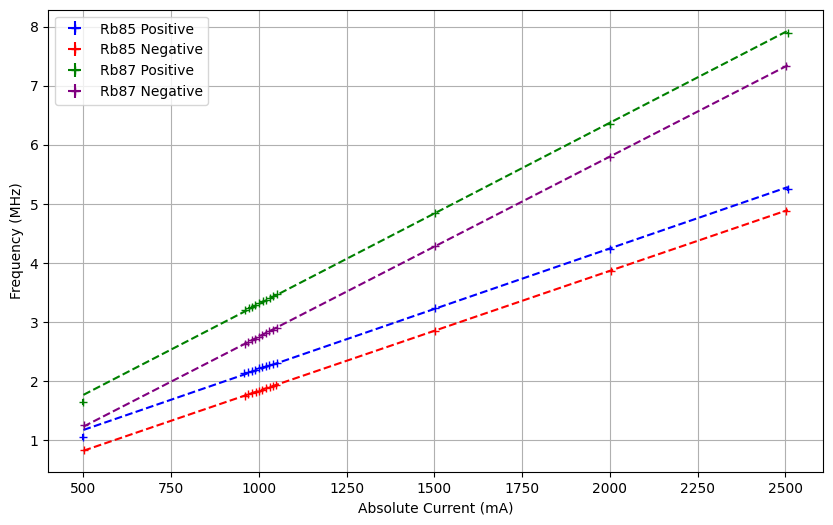

For Rubidium 85 (+):
Slope (m): 0.002049
Intercept (c): 0.145777

For Rubidium 85 (-):
Slope (m): 0.002049
Intercept (c): -0.196492

For Rubidium 87 (+):
Slope (m): 0.003072
Intercept (c): 0.228725

For Rubidium 87 (-):
Slope (m): 0.003048
Intercept (c): -0.296871


In [2]:
# Define a linear fitting function
def linear_fit(x, m, c):
    return m * x + c

# Define a function to calculate chi-squared
def chi_squared(observed, expected, errors):
    return np.sum(((observed - expected) / errors)**2)

def red_chi_squared(observed, expected, error):
    return chi_squared(observed, expected, error) / (len(observed) - 2)

# Separate data by isotope and polarity
rb85_positive = rb85_data[rb85_data['Polarity'] == 'P']
rb85_negative = rb85_data[rb85_data['Polarity'] == 'N']
rb87_positive = rb87_data[rb87_data['Polarity'] == 'P']
rb87_negative = rb87_data[rb87_data['Polarity'] == 'N']

# Define current values for fitting
rb85_values = np.linspace(min(rb85_data['Abs Current']), max(rb85_data['Abs Current']), 1000)
rb87_values = np.linspace(min(rb87_data['Abs Current']), max(rb87_data['Abs Current']), 1000)

# Fit lines
rb85_positive_params, _ = curve_fit(linear_fit, rb85_positive['Abs Current'], rb85_positive['Freq (MHz)'])
rb85_negative_params, _ = curve_fit(linear_fit, rb85_negative['Abs Current'], rb85_negative['Freq (MHz)'],)
rb87_positive_params, _ = curve_fit(linear_fit, rb87_positive['Abs Current'], rb87_positive['Freq (MHz)'],)
rb87_negative_params, _ = curve_fit(linear_fit, rb87_negative['Abs Current'], rb87_negative['Freq (MHz)'], )

# Calculate chi-squared values
chi_rb85_positive = chi_squared(rb85_positive['Freq (MHz)'], linear_fit(rb85_positive['Abs Current'], *rb85_positive_params), rb85_positive['Freq Err'])
chi_rb85_negative = chi_squared(rb85_negative['Freq (MHz)'], linear_fit(rb85_negative['Abs Current'], *rb85_negative_params), rb85_negative['Freq Err'])
chi_rb87_positive = chi_squared(rb87_positive['Freq (MHz)'], linear_fit(rb87_positive['Abs Current'], *rb87_positive_params), rb87_positive['Freq Err'])
chi_rb87_negative = chi_squared(rb87_negative['Freq (MHz)'], linear_fit(rb87_negative['Abs Current'], *rb87_negative_params), rb87_negative['Freq Err'])

print("Chi squared {85Rb, +} ="+str(chi_rb85_positive))
print("Chi squared {85Rb, -} ="+str(chi_rb85_negative))
print("Chi squared {87Rb, +} ="+str(chi_rb87_positive))
print("Chi squared {87Rb, -} ="+str(chi_rb87_negative))

# Calculate chi-squared values
red_chi_rb85_positive = red_chi_squared(rb85_positive['Freq (MHz)'], linear_fit(rb85_positive['Abs Current'], *rb85_positive_params), rb85_positive['Freq Err'])
red_chi_rb85_negative = red_chi_squared(rb85_negative['Freq (MHz)'], linear_fit(rb85_negative['Abs Current'], *rb85_negative_params), rb85_negative['Freq Err'])
red_chi_rb87_positive = red_chi_squared(rb87_positive['Freq (MHz)'], linear_fit(rb87_positive['Abs Current'], *rb87_positive_params), rb87_positive['Freq Err'])
red_chi_rb87_negative = red_chi_squared(rb87_negative['Freq (MHz)'], linear_fit(rb87_negative['Abs Current'], *rb87_negative_params), rb87_negative['Freq Err'])

print("Reduced Chi squared {85Rb, +} ="+str(red_chi_rb85_positive))
print("Reduced Chi squared {85Rb, -} ="+str(red_chi_rb85_negative))
print("Reduced Chi squared {87Rb, +} ="+str(red_chi_rb87_positive))
print("Reduced Chi squared {87Rb, -} ="+str(red_chi_rb87_negative))

# Plotting and fitting
plt.figure(figsize=(10, 6))

# Rubidium 85 - Positive Polarity
plt.errorbar(rb85_positive['Abs Current'], rb85_positive['Freq (MHz)'], 
             xerr=rb85_positive['Current Error'], yerr=rb85_positive['Freq Err'],
             fmt='+', label='Rb85 Positive', color='blue')
plt.plot(rb85_values, linear_fit(rb85_values, *rb85_positive_params), color='blue', linestyle='--')

# Rubidium 85 - Negative Polarity
plt.errorbar(rb85_negative['Abs Current'], rb85_negative['Freq (MHz)'], 
             xerr=rb85_negative['Current Error'], yerr=rb85_negative['Freq Err'],
             fmt='+', label='Rb85 Negative', color='red')
plt.plot(rb85_values, linear_fit(rb85_values, *rb85_negative_params), color='red', linestyle='--')

# Rubidium 87 - Positive Polarity
plt.errorbar(rb87_positive['Abs Current'], rb87_positive['Freq (MHz)'], 
             xerr=rb87_positive['Current Error'], yerr=rb87_positive['Freq Err'],
             fmt='+', label='Rb87 Positive', color='green')
plt.plot(rb87_values, linear_fit(rb87_values, *rb87_positive_params), color='green', linestyle='--')

# Rubidium 87 - Negative Polarity
plt.errorbar(rb87_negative['Abs Current'], rb87_negative['Freq (MHz)'], 
             xerr=rb87_negative['Current Error'], yerr=rb87_negative['Freq Err'],
             fmt='+', label='Rb87 Negative', color='purple')
plt.plot(rb87_values, linear_fit(rb87_values, *rb87_negative_params), color='purple', linestyle='--')

# Add labels and legend
plt.ylabel('Frequency (MHz)')
plt.xlabel('Absolute Current (mA)')
plt.legend()
plt.grid(True)
#plt.text(2, 9.5, f'Chi-squared (Rb85 Positive): {chi_rb85_positive:.2f}', fontsize=12, color='blue')

# Show the plot
plt.show()

# Print the parameters
print("For Rubidium 85 (+):")
print(f"Slope (m): {rb85_positive_params[0]:.6f}")
print(f"Intercept (c): {rb85_positive_params[1]:.6f}\n")

print("For Rubidium 85 (-):")
print(f"Slope (m): {rb85_positive_params[0]:.6f}")
print(f"Intercept (c): {rb85_negative_params[1]:.6f}\n")

print("For Rubidium 87 (+):")
print(f"Slope (m): {rb87_positive_params[0]:.4}")
print(f"Intercept (c): {rb87_positive_params[1]:.6f}\n")

print("For Rubidium 87 (-):")
print(f"Slope (m): {rb87_negative_params[0]:.4}")
print(f"Intercept (c): {rb87_negative_params[1]:.6f}")

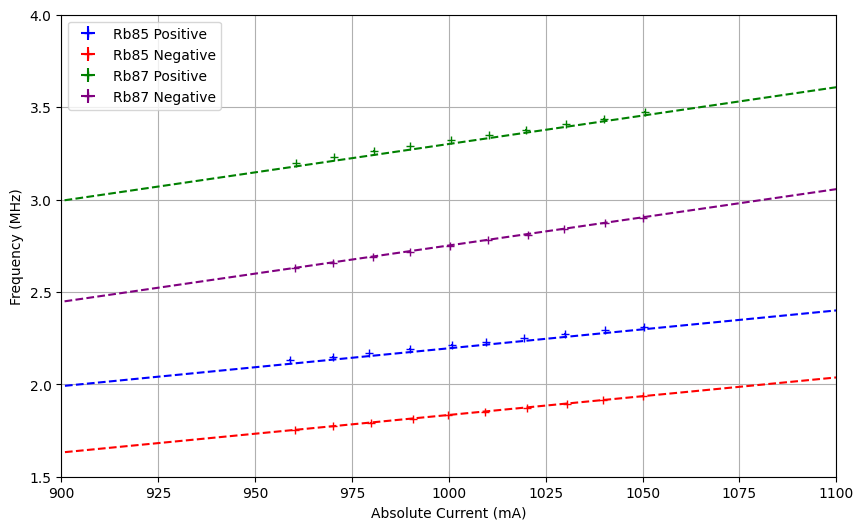

In [3]:
# Plotting and fitting
plt.figure(figsize=(10, 6))

# Rubidium 85 - Positive Polarity
plt.errorbar(rb85_positive['Abs Current'], rb85_positive['Freq (MHz)'], 
             yerr=rb85_positive['Freq Err'], xerr=rb85_positive['Current Error'],
             fmt='+', label='Rb85 Positive', color='blue')
plt.plot(rb85_values, linear_fit(rb85_values, *rb85_positive_params), color='blue', linestyle='--')

# Rubidium 85 - Negative Polarity
plt.errorbar(rb85_negative['Abs Current'], rb85_negative['Freq (MHz)'], 
             yerr=rb85_negative['Freq Err'], xerr=rb85_negative['Current Error'],
             fmt='+', label='Rb85 Negative', color='red')
plt.plot(rb85_values, linear_fit(rb85_values, *rb85_negative_params), color='red', linestyle='--')

# Rubidium 87 - Positive Polarity
plt.errorbar(rb87_positive['Abs Current'], rb87_positive['Freq (MHz)'], 
             yerr=rb87_positive['Freq Err'], xerr=rb87_positive['Current Error'],
             fmt='+', label='Rb87 Positive', color='green')
plt.plot(rb87_values, linear_fit(rb87_values, *rb87_positive_params), color='green', linestyle='--')

# Rubidium 87 - Negative Polarity
plt.errorbar(rb87_negative['Abs Current'], rb87_negative['Freq (MHz)'], 
             yerr=rb87_negative['Freq Err'], xerr=rb87_negative['Current Error'],
             fmt='+', label='Rb87 Negative', color='purple')
plt.plot(rb87_values, linear_fit(rb87_values, *rb87_negative_params), color='purple', linestyle='--')

# Add labels and legend
plt.ylabel('Frequency (MHz)')
plt.xlabel('Absolute Current (mA)')
plt.legend()
plt.grid(True)
plt.xlim(900,1100)
plt.ylim(1.5,4)

# Show the plot
plt.show()

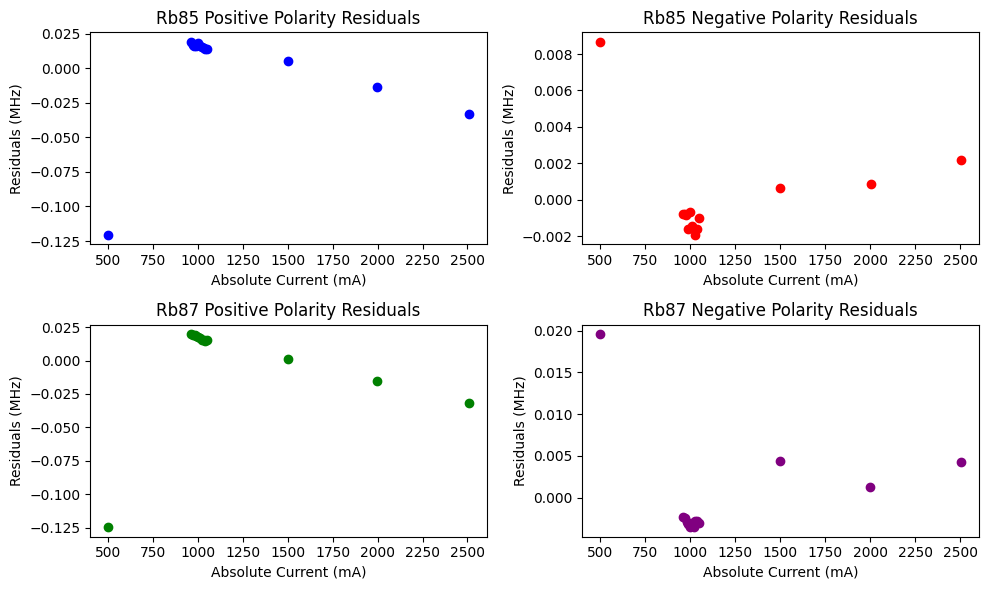

In [4]:
# Calculate residuals for each combination
rb85_positive_res = rb85_positive['Freq (MHz)'] - linear_fit(rb85_positive['Abs Current'], *rb85_positive_params)
rb85_negative_res = rb85_negative['Freq (MHz)'] - linear_fit(rb85_negative['Abs Current'], *rb85_negative_params)
rb87_positive_res = rb87_positive['Freq (MHz)'] - linear_fit(rb87_positive['Abs Current'], *rb87_positive_params)
rb87_negative_res = rb87_negative['Freq (MHz)'] - linear_fit(rb87_negative['Abs Current'], *rb87_negative_params)

# Plotting residuals
plt.figure(figsize=(10, 6))

# Residuals for Rubidium 85 - Positive Polarity
plt.subplot(2, 2, 1)
plt.plot(rb85_positive['Abs Current'], rb85_positive_res, 'o', color='blue')
plt.title('Rb85 Positive Polarity Residuals')
plt.xlabel('Absolute Current (mA)')
plt.ylabel('Residuals (MHz)')

# Residuals for Rubidium 85 - Negative Polarity
plt.subplot(2, 2, 2)
plt.plot(rb85_negative['Abs Current'], rb85_negative_res, 'o', color='red')
plt.title('Rb85 Negative Polarity Residuals')
plt.xlabel('Absolute Current (mA)')
plt.ylabel('Residuals (MHz)')

# Residuals for Rubidium 87 - Positive Polarity
plt.subplot(2, 2, 3)
plt.plot(rb87_positive['Abs Current'], rb87_positive_res, 'o', color='green')
plt.title('Rb87 Positive Polarity Residuals')
plt.xlabel('Absolute Current (mA)')
plt.ylabel('Residuals (MHz)')

# Residuals for Rubidium 87 - Negative Polarity
plt.subplot(2, 2, 4)
plt.plot(rb87_negative['Abs Current'], rb87_negative_res, 'o', color='purple')
plt.title('Rb87 Negative Polarity Residuals')
plt.xlabel('Absolute Current (mA)')
plt.ylabel('Residuals (MHz)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

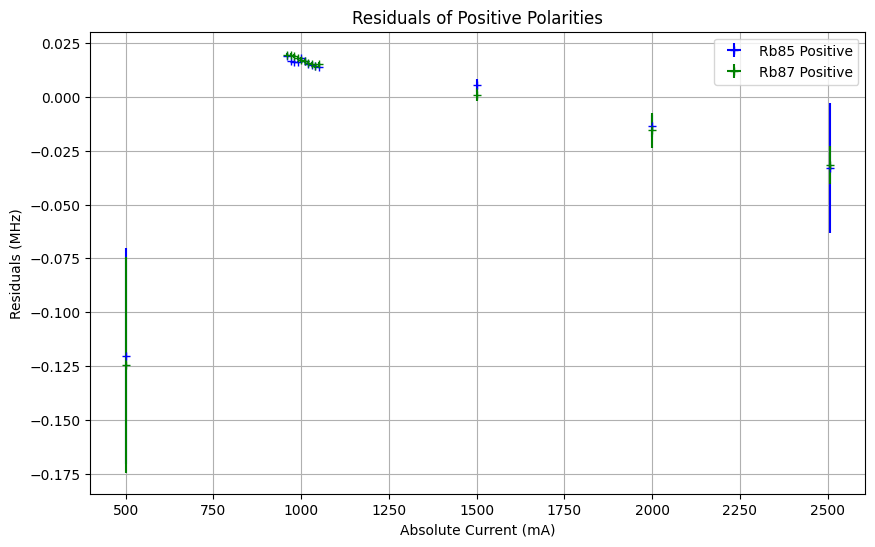

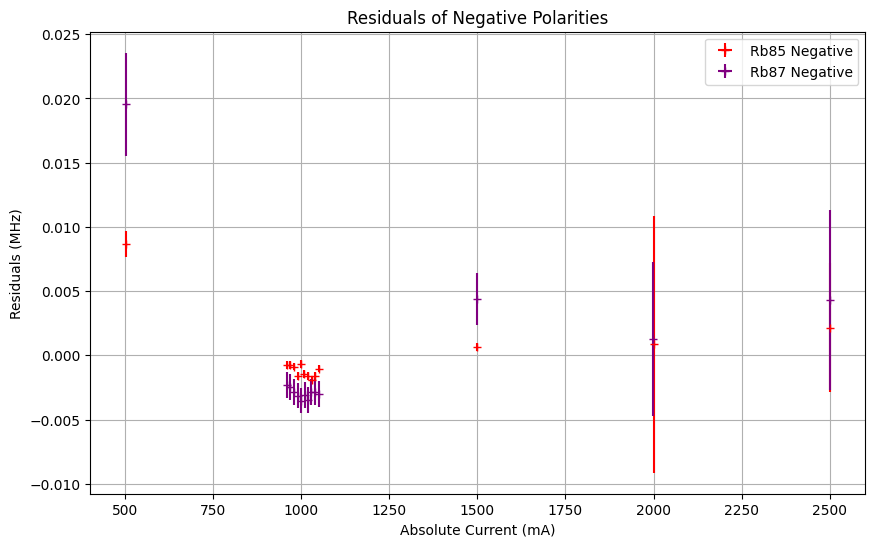

In [5]:
# Combine residuals
all_positive_res = np.concatenate((rb85_positive_res, rb87_positive_res))
all_negative_res = np.concatenate((rb85_negative_res, rb87_negative_res))

# Plotting residuals together
plt.figure(figsize=(10, 6))

# Residuals for Positive Polarity
plt.errorbar(rb85_positive['Abs Current'], rb85_positive_res, fmt='+', xerr=rb85_positive['Current Error'], yerr=rb85_positive['Freq Err'], label='Rb85 Positive', color='blue')
plt.errorbar(rb87_positive['Abs Current'], rb87_positive_res, fmt='+', xerr=rb87_positive['Current Error'], yerr=rb87_positive['Freq Err'], label='Rb87 Positive', color='green')

# Add labels and legend
plt.title('Residuals of Positive Polarities')
plt.xlabel('Absolute Current (mA)')
plt.ylabel('Residuals (MHz)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Plotting residuals together
plt.figure(figsize=(10, 6))

# Residuals for Negative Polarity
plt.errorbar(rb85_negative['Abs Current'], rb85_negative_res, fmt='+', xerr=rb85_negative['Current Error'], yerr=rb85_negative['Freq Err'], label='Rb85 Negative', color='red')
plt.errorbar(rb87_negative['Abs Current'], rb87_negative_res, fmt='+', xerr=rb87_negative['Current Error'], yerr=rb87_negative['Freq Err'], label='Rb87 Negative', color='purple')

# Add labels and legend
plt.title('Residuals of Negative Polarities')
plt.xlabel('Absolute Current (mA)')
plt.ylabel('Residuals (MHz)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [6]:
print("Old Chi squared {85Rb, +} ="+str(chi_rb85_positive))
print("Old Chi squared {85Rb, -} ="+str(chi_rb85_negative))
print("Old Chi squared {87Rb, +} ="+str(chi_rb87_positive))
print("Old Chi squared {87Rb, -} ="+str(chi_rb87_negative))

print("Old Red Chi squared {85Rb, +} ="+str(red_chi_rb85_positive))
print("Old Red Chi squared {85Rb, -} ="+str(red_chi_rb85_negative))
print("Old Red Chi squared {87Rb, +} ="+str(red_chi_rb87_positive))
print("Old Red Chi squared {87Rb, -} ="+str(red_chi_rb87_negative))

# Define weights for each data point based on errors
rb85_positive_weights = 1 / (rb85_positive['Freq Err']**2)
rb85_negative_weights = 1 / (rb85_negative['Freq Err']**2)
rb87_positive_weights = 1 / (rb87_positive['Freq Err']**2)
rb87_negative_weights = 1 / (rb87_negative['Freq Err']**2)

# Fit lines using weighted regression
rb85_positive_params = np.polyfit(rb85_data[rb85_data['Polarity'] == 'P']['Abs Current' ], 
                                   rb85_data[rb85_data['Polarity'] == 'P']['Freq (MHz)'], 
                                   1, w=rb85_positive_weights)
rb85_negative_params = np.polyfit(rb85_data[rb85_data['Polarity'] == 'N']['Abs Current'], 
                                   rb85_data[rb85_data['Polarity'] == 'N']['Freq (MHz)'], 
                                   1, w=rb85_negative_weights)
rb87_positive_params = np.polyfit(rb87_data[rb87_data['Polarity'] == 'P']['Abs Current'], 
                                   rb87_data[rb87_data['Polarity'] == 'P']['Freq (MHz)'], 
                                   1, w=rb87_positive_weights)
rb87_negative_params = np.polyfit(rb87_data[rb87_data['Polarity'] == 'N']['Abs Current'], 
                                   rb87_data[rb87_data['Polarity'] == 'N']['Freq (MHz)'], 
                                   1, w=rb87_negative_weights)

Old Chi squared {85Rb, +} =31493.97480190644
Old Chi squared {85Rb, -} =270.3743884654675
Old Chi squared {87Rb, +} =2972.652619638943
Old Chi squared {87Rb, -} =117.66708803788629
Old Red Chi squared {85Rb, +} =2624.49790015887
Old Red Chi squared {85Rb, -} =22.53119903878896
Old Red Chi squared {87Rb, +} =247.7210516365786
Old Red Chi squared {87Rb, -} =9.805590669823857


Chi squared {85Rb, +} =116.51692166754509
Chi squared {85Rb, -} =158.86336608603983
Chi squared {87Rb, +} =43.754214262370326
Chi squared {87Rb, -} =47.19345952193149
Reduced Chi squared {85Rb, +} =9.709743472295424
Reduced Chi squared {85Rb, -} =13.23861384050332
Reduced Chi squared {87Rb, +} =3.646184521864194
Reduced Chi squared {87Rb, -} =3.9327882934942906


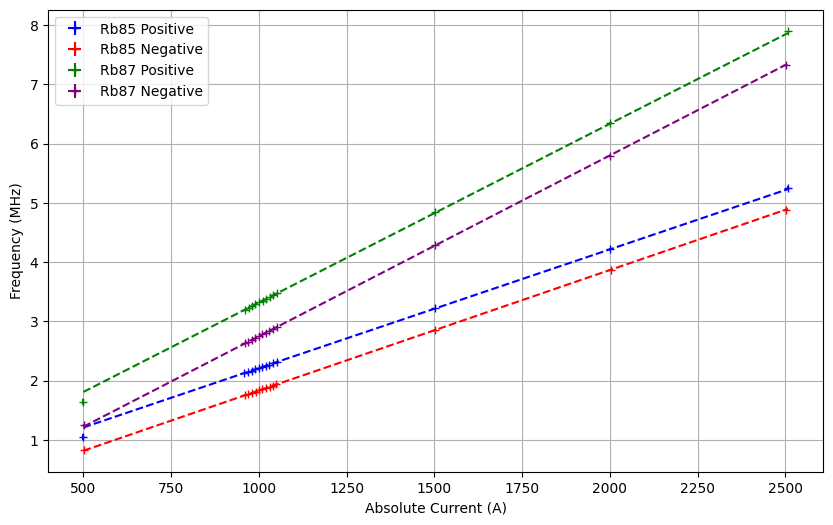

In [7]:
# Calculate the fitted lines
rb85_positive_fit = np.polyval(rb85_positive_params, rb85_values)
rb85_negative_fit = np.polyval(rb85_negative_params, rb85_values)
rb87_positive_fit = np.polyval(rb87_positive_params, rb87_values)
rb87_negative_fit = np.polyval(rb87_negative_params, rb87_values)

# Calculate chi-squared values
chi_rb85_positive = chi_squared(rb85_positive['Freq (MHz)'], linear_fit(rb85_positive['Abs Current'], *rb85_positive_params), rb85_positive['Freq Err'])
chi_rb85_negative = chi_squared(rb85_negative['Freq (MHz)'], linear_fit(rb85_negative['Abs Current'], *rb85_negative_params), rb85_negative['Freq Err'])
chi_rb87_positive = chi_squared(rb87_positive['Freq (MHz)'], linear_fit(rb87_positive['Abs Current'], *rb87_positive_params), rb87_positive['Freq Err'])
chi_rb87_negative = chi_squared(rb87_negative['Freq (MHz)'], linear_fit(rb87_negative['Abs Current'], *rb87_negative_params), rb87_negative['Freq Err'])

print("Chi squared {85Rb, +} ="+str(chi_rb85_positive))
print("Chi squared {85Rb, -} ="+str(chi_rb85_negative))
print("Chi squared {87Rb, +} ="+str(chi_rb87_positive))
print("Chi squared {87Rb, -} ="+str(chi_rb87_negative))

# Calculate chi-squared values
red_chi_rb85_positive = red_chi_squared(rb85_positive['Freq (MHz)'], linear_fit(rb85_positive['Abs Current'], *rb85_positive_params), rb85_positive['Freq Err'])
red_chi_rb85_negative = red_chi_squared(rb85_negative['Freq (MHz)'], linear_fit(rb85_negative['Abs Current'], *rb85_negative_params), rb85_negative['Freq Err'])
red_chi_rb87_positive = red_chi_squared(rb87_positive['Freq (MHz)'], linear_fit(rb87_positive['Abs Current'], *rb87_positive_params), rb87_positive['Freq Err'])
red_chi_rb87_negative = red_chi_squared(rb87_negative['Freq (MHz)'], linear_fit(rb87_negative['Abs Current'], *rb87_negative_params), rb87_negative['Freq Err'])

print("Reduced Chi squared {85Rb, +} ="+str(red_chi_rb85_positive))
print("Reduced Chi squared {85Rb, -} ="+str(red_chi_rb85_negative))
print("Reduced Chi squared {87Rb, +} ="+str(red_chi_rb87_positive))
print("Reduced Chi squared {87Rb, -} ="+str(red_chi_rb87_negative))

# Plotting the data points and fitted lines
plt.figure(figsize=(10, 6))

# Rubidium 85 - Positive Polarity
plt.errorbar(rb85_positive['Abs Current'], 
             rb85_positive['Freq (MHz)'], 
             xerr=rb85_positive['Current Error'], 
             yerr=rb85_positive['Freq Err'],
             fmt='+', label='Rb85 Positive', color='blue')
plt.plot(rb85_values, rb85_positive_fit, color='blue', linestyle='--')

# Rubidium 85 - Negative Polarity
plt.errorbar(rb85_negative['Abs Current'], 
             rb85_negative['Freq (MHz)'], 
             xerr=rb85_negative['Current Error'], 
             yerr=rb85_negative['Freq Err'],
             fmt='+', label='Rb85 Negative', color='red')
plt.plot(rb85_values, rb85_negative_fit, color='red', linestyle='--')

# Rubidium 87 - Positive Polarity
plt.errorbar(rb87_positive['Abs Current'], 
             rb87_positive['Freq (MHz)'], 
             xerr=rb87_positive['Current Error'], 
             yerr=rb87_positive['Freq Err'],
             fmt='+', label='Rb87 Positive', color='green')
plt.plot(rb87_values, rb87_positive_fit, color='green', linestyle='--')

# Rubidium 87 - Negative Polarity
plt.errorbar(rb87_negative['Abs Current'], 
             rb87_negative['Freq (MHz)'], 
             xerr=rb87_negative['Current Error'], 
             yerr=rb87_negative['Freq Err'],
             fmt='+', label='Rb87 Negative', color='purple')
plt.plot(rb87_values, rb87_negative_fit, color='purple', linestyle='--')

# Add labels and legend
plt.xlabel('Absolute Current (A)')
plt.ylabel('Frequency (MHz)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


/var/folders/8g/g48bxxwn3139k68mrwrpq2xw0000gn/T/ipykernel_84655/3486386790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rb85_positive['Freq Err'] = rb85_positive['Freq Err']*3.13
/var/folders/8g/g48bxxwn3139k68mrwrpq2xw0000gn/T/ipykernel_84655/3486386790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rb85_negative['Freq Err'] = rb85_negative['Freq Err']*3.65
/var/folders/8g/g48bxxwn3139k68mrwrpq2xw0000gn/T/ipykernel_84655/3486386790.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

Chi squared {85Rb, +} =11.893243951411183
Chi squared {85Rb, -} =11.924441064818327
Chi squared {87Rb, +} =11.993699257796003
Chi squared {87Rb, -} =11.917239342927916
Reduced Chi squared {85Rb, +} =0.9911036626175985
Reduced Chi squared {85Rb, -} =0.9937034220681938
Reduced Chi squared {87Rb, +} =0.9994749381496669
Reduced Chi squared {87Rb, -} =0.9931032785773263


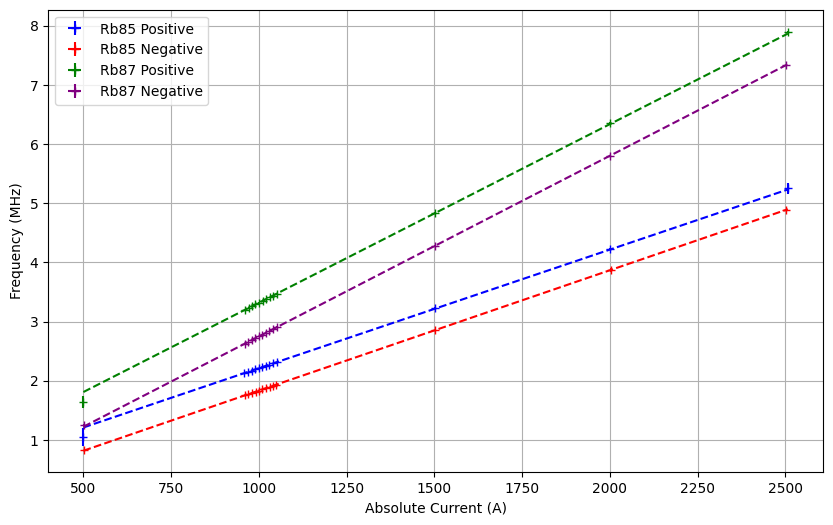

For Rubidium 85 (+):
Slope (m): 0.002005
Intercept (c): 0.206684

For Rubidium 85 (-):
Slope (m): 0.002034
Intercept (c): -0.200864

For Rubidium 87 (+):
Slope (m): 0.003019
Intercept (c): 0.299229

For Rubidium 87 (-):
Slope (m): 0.003054
Intercept (c): -0.305209
Standard Error of Fitted Slope (85Rb, +): 0.000022
Standard Error of Fitted Slope (85Rb, -): 0.000002
Standard Error of Fitted Slope (87Rb, +): 0.000022
Standard Error of Fitted Slope (87Rb, -): 0.000004
Confidence Interval for Rubidium 85 (+): (0.0019623201819906825, 0.0020467616706986865)
Confidence Interval for Rubidium 85 (-): (0.00203075115521474, 0.0020369293578083917)
Confidence Interval for Rubidium 87 (+): (0.0029749380034151483, 0.003062332750770721)
Confidence Interval for Rubidium 87 (-): (0.0030465180250287545, 0.003060619737009562)
Error for Rubidium 85 (+): 4.222074435400198e-05
Error for Rubidium 85 (-): 3.0891012968259184e-06
Error for Rubidium 87 (+): 4.369737367778629e-05
Error for Rubidium 87 (-): 7.050855

In [8]:
rb85_positive['Freq Err'] = rb85_positive['Freq Err']*3.13
rb85_negative['Freq Err'] = rb85_negative['Freq Err']*3.65
rb87_positive['Freq Err'] = rb87_positive['Freq Err']*1.91
rb87_negative['Freq Err'] = rb87_negative['Freq Err']*1.99

# Define weights for each data point based on errors
rb85_positive_weights = 1 / (rb85_positive['Freq Err']**2)
rb85_negative_weights = 1 / (rb85_negative['Freq Err']**2)
rb87_positive_weights = 1 / (rb87_positive['Freq Err']**2)
rb87_negative_weights = 1 / (rb87_negative['Freq Err']**2)

# Fit lines using weighted regression
rb85_positive_params = np.polyfit(rb85_data[rb85_data['Polarity'] == 'P']['Abs Current' ], 
                                   rb85_data[rb85_data['Polarity'] == 'P']['Freq (MHz)'], 
                                   1, w=rb85_positive_weights)
rb85_negative_params = np.polyfit(rb85_data[rb85_data['Polarity'] == 'N']['Abs Current'], 
                                   rb85_data[rb85_data['Polarity'] == 'N']['Freq (MHz)'], 
                                   1, w=rb85_negative_weights)
rb87_positive_params = np.polyfit(rb87_data[rb87_data['Polarity'] == 'P']['Abs Current'], 
                                   rb87_data[rb87_data['Polarity'] == 'P']['Freq (MHz)'], 
                                   1, w=rb87_positive_weights)
rb87_negative_params = np.polyfit(rb87_data[rb87_data['Polarity'] == 'N']['Abs Current'], 
                                   rb87_data[rb87_data['Polarity'] == 'N']['Freq (MHz)'], 
                                   1, w=rb87_negative_weights)

# Calculate the fitted lines
rb85_positive_fit = np.polyval(rb85_positive_params, rb85_values)
rb85_negative_fit = np.polyval(rb85_negative_params, rb85_values)
rb87_positive_fit = np.polyval(rb87_positive_params, rb87_values)
rb87_negative_fit = np.polyval(rb87_negative_params, rb87_values)

# Calculate chi-squared values
chi_rb85_positive = chi_squared(rb85_positive['Freq (MHz)'], linear_fit(rb85_positive['Abs Current'], *rb85_positive_params), rb85_positive['Freq Err'])
chi_rb85_negative = chi_squared(rb85_negative['Freq (MHz)'], linear_fit(rb85_negative['Abs Current'], *rb85_negative_params), rb85_negative['Freq Err'])
chi_rb87_positive = chi_squared(rb87_positive['Freq (MHz)'], linear_fit(rb87_positive['Abs Current'], *rb87_positive_params), rb87_positive['Freq Err'])
chi_rb87_negative = chi_squared(rb87_negative['Freq (MHz)'], linear_fit(rb87_negative['Abs Current'], *rb87_negative_params), rb87_negative['Freq Err'])

print("Chi squared {85Rb, +} ="+str(chi_rb85_positive))
print("Chi squared {85Rb, -} ="+str(chi_rb85_negative))
print("Chi squared {87Rb, +} ="+str(chi_rb87_positive))
print("Chi squared {87Rb, -} ="+str(chi_rb87_negative))

# Calculate chi-squared values
red_chi_rb85_positive = red_chi_squared(rb85_positive['Freq (MHz)'], linear_fit(rb85_positive['Abs Current'], *rb85_positive_params), rb85_positive['Freq Err'])
red_chi_rb85_negative = red_chi_squared(rb85_negative['Freq (MHz)'], linear_fit(rb85_negative['Abs Current'], *rb85_negative_params), rb85_negative['Freq Err'])
red_chi_rb87_positive = red_chi_squared(rb87_positive['Freq (MHz)'], linear_fit(rb87_positive['Abs Current'], *rb87_positive_params), rb87_positive['Freq Err'])
red_chi_rb87_negative = red_chi_squared(rb87_negative['Freq (MHz)'], linear_fit(rb87_negative['Abs Current'], *rb87_negative_params), rb87_negative['Freq Err'])

print("Reduced Chi squared {85Rb, +} ="+str(red_chi_rb85_positive))
print("Reduced Chi squared {85Rb, -} ="+str(red_chi_rb85_negative))
print("Reduced Chi squared {87Rb, +} ="+str(red_chi_rb87_positive))
print("Reduced Chi squared {87Rb, -} ="+str(red_chi_rb87_negative))

# Plotting the data points and fitted lines
plt.figure(figsize=(10, 6))

# Rubidium 85 - Positive Polarity
plt.errorbar(rb85_positive['Abs Current'], 
             rb85_positive['Freq (MHz)'], 
             xerr=rb85_positive['Current Error'], 
             yerr=rb85_positive['Freq Err'],
             fmt='+', label='Rb85 Positive', color='blue')
plt.plot(rb85_values, rb85_positive_fit, color='blue', linestyle='--')

# Rubidium 85 - Negative Polarity
plt.errorbar(rb85_negative['Abs Current'], 
             rb85_negative['Freq (MHz)'], 
             xerr=rb85_negative['Current Error'], 
             yerr=rb85_negative['Freq Err'],
             fmt='+', label='Rb85 Negative', color='red')
plt.plot(rb85_values, rb85_negative_fit, color='red', linestyle='--')

# Rubidium 87 - Positive Polarity
plt.errorbar(rb87_positive['Abs Current'], 
             rb87_positive['Freq (MHz)'], 
             xerr=rb87_positive['Current Error'], 
             yerr=rb87_positive['Freq Err'],
             fmt='+', label='Rb87 Positive', color='green')
plt.plot(rb87_values, rb87_positive_fit, color='green', linestyle='--')

# Rubidium 87 - Negative Polarity
plt.errorbar(rb87_negative['Abs Current'], 
             rb87_negative['Freq (MHz)'], 
             xerr=rb87_negative['Current Error'], 
             yerr=rb87_negative['Freq Err'],
             fmt='+', label='Rb87 Negative', color='purple')
plt.plot(rb87_values, rb87_negative_fit, color='purple', linestyle='--')

# Add labels and legend
plt.xlabel('Absolute Current (A)')
plt.ylabel('Frequency (MHz)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print the parameters
print("For Rubidium 85 (+):")
print(f"Slope (m): {rb85_positive_params[0]:.6f}")
print(f"Intercept (c): {rb85_positive_params[1]:.6f}\n")

print("For Rubidium 85 (-):")
print(f"Slope (m): {rb85_negative_params[0]:.6f}")
print(f"Intercept (c): {rb85_negative_params[1]:.6f}\n")

print("For Rubidium 87 (+):")
print(f"Slope (m): {rb87_positive_params[0]:.4}")
print(f"Intercept (c): {rb87_positive_params[1]:.6f}\n")

print("For Rubidium 87 (-):")
print(f"Slope (m): {rb87_negative_params[0]:.4}")
print(f"Intercept (c): {rb87_negative_params[1]:.6f}")

import scipy.stats as stats

# Calculate the standard error of the fitted slopes
std_err_rb85_positive = np.sqrt(np.sum(rb85_positive_res**2) / (len(rb85_positive_res) - 2)) / np.sqrt(np.sum((rb85_positive['Abs Current'] - np.mean(rb85_positive['Abs Current']))**2))
std_err_rb85_negative = np.sqrt(np.sum(rb85_negative_res**2) / (len(rb85_negative_res) - 2)) / np.sqrt(np.sum((rb85_negative['Abs Current'] - np.mean(rb85_negative['Abs Current']))**2))
std_err_rb87_positive = np.sqrt(np.sum(rb87_positive_res**2) / (len(rb87_positive_res) - 2)) / np.sqrt(np.sum((rb87_positive['Abs Current'] - np.mean(rb87_positive['Abs Current']))**2))
std_err_rb87_negative = np.sqrt(np.sum(rb87_negative_res**2) / (len(rb87_negative_res) - 2)) / np.sqrt(np.sum((rb87_negative['Abs Current'] - np.mean(rb87_negative['Abs Current']))**2))

print(f'Standard Error of Fitted Slope (85Rb, +): {std_err_rb85_positive:.6f}')
print(f'Standard Error of Fitted Slope (85Rb, -): {std_err_rb85_negative:.6f}')
print(f'Standard Error of Fitted Slope (87Rb, +): {std_err_rb87_positive:.6f}')
print(f'Standard Error of Fitted Slope (87Rb, -): {std_err_rb87_negative:.6f}')

n = len(rb85_values) + len(rb87_values)  # Total number of data points
t_critical = stats.t.ppf(1 - 0.025, df=n-2)  # 95% confidence interval for two-tailed test

# Calculate confidence intervals
ci_rb85_positive = (rb85_positive_params[0] - t_critical * std_err_rb85_positive, rb85_positive_params[0] + t_critical * std_err_rb85_positive)
ci_rb85_negative = (rb85_negative_params[0] - t_critical * std_err_rb85_negative, rb85_negative_params[0] + t_critical * std_err_rb85_negative)
ci_rb87_positive = (rb87_positive_params[0] - t_critical * std_err_rb87_positive, rb87_positive_params[0] + t_critical * std_err_rb87_positive)
ci_rb87_negative = (rb87_negative_params[0] - t_critical * std_err_rb87_negative, rb87_negative_params[0] + t_critical * std_err_rb87_negative)

# Print confidence intervals
print(f'Confidence Interval for Rubidium 85 (+): {ci_rb85_positive}')
print(f'Confidence Interval for Rubidium 85 (-): {ci_rb85_negative}')
print(f'Confidence Interval for Rubidium 87 (+): {ci_rb87_positive}')
print(f'Confidence Interval for Rubidium 87 (-): {ci_rb87_negative}')

# Print slope error
print(f'Error for Rubidium 85 (+): {rb85_positive_params[0]-ci_rb85_positive[0]}')
print(f'Error for Rubidium 85 (-): {rb85_negative_params[0]-ci_rb85_negative[0]}')
print(f'Error for Rubidium 87 (+): {rb87_positive_params[0]-ci_rb87_positive[0]}')
print(f'Error for Rubidium 87 (-): {rb87_negative_params[0]-ci_rb87_negative[0]}')

Variance of positive residuals: 0.001931
Variance of negative residuals: 0.000027


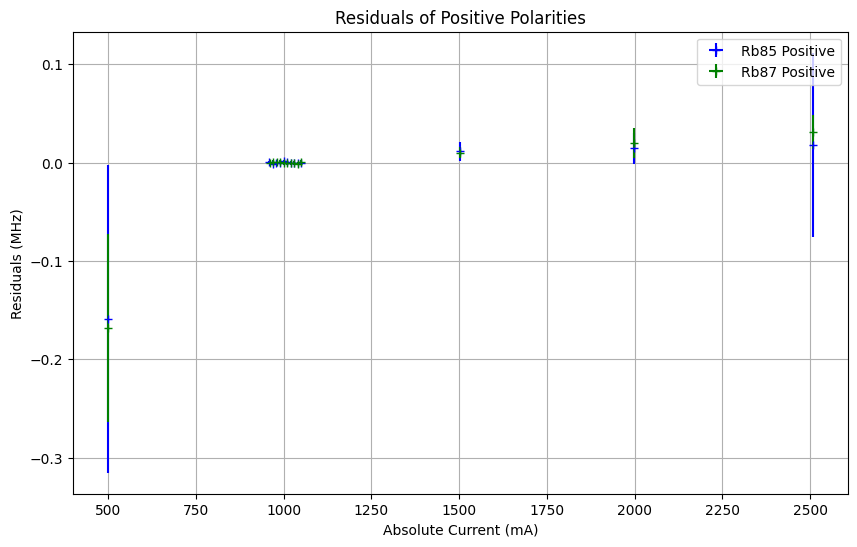

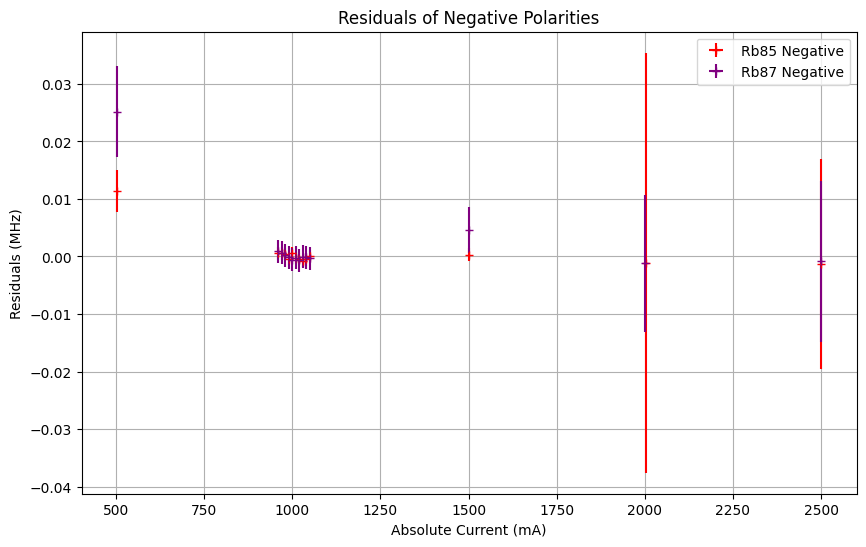

In [9]:
# Calculate residuals for each combination
rb85_positive_res = rb85_positive['Freq (MHz)'] - linear_fit(rb85_positive['Abs Current'], *rb85_positive_params)
rb85_negative_res = rb85_negative['Freq (MHz)'] - linear_fit(rb85_negative['Abs Current'], *rb85_negative_params)
rb87_positive_res = rb87_positive['Freq (MHz)'] - linear_fit(rb87_positive['Abs Current'], *rb87_positive_params)
rb87_negative_res = rb87_negative['Freq (MHz)'] - linear_fit(rb87_negative['Abs Current'], *rb87_negative_params)

# Combine residuals
all_positive_res = np.concatenate((rb85_positive_res, rb87_positive_res))
all_negative_res = np.concatenate((rb85_negative_res, rb87_negative_res))

# Calculate variances
variance_positive = np.var(all_positive_res)
variance_negative = np.var(all_negative_res)

print(f'Variance of positive residuals: {variance_positive:.6f}')
print(f'Variance of negative residuals: {variance_negative:.6f}')

# Plotting residuals together
plt.figure(figsize=(10, 6))

# Residuals for Positive Polarity
plt.errorbar(rb85_positive['Abs Current'], rb85_positive_res, fmt='+', xerr=rb85_positive['Current Error'], yerr=rb85_positive['Freq Err'], label='Rb85 Positive', color='blue')
plt.errorbar(rb87_positive['Abs Current'], rb87_positive_res, fmt='+', xerr=rb87_positive['Current Error'], yerr=rb87_positive['Freq Err'], label='Rb87 Positive', color='green')

# Add labels and legend
plt.title('Residuals of Positive Polarities')
plt.xlabel('Absolute Current (mA)')
plt.ylabel('Residuals (MHz)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Plotting residuals together
plt.figure(figsize=(10, 6))

# Residuals for Negative Polarity
plt.errorbar(rb85_negative['Abs Current'], rb85_negative_res, fmt='+', xerr=rb85_negative['Current Error'], yerr=rb85_negative['Freq Err'], label='Rb85 Negative', color='red')
plt.errorbar(rb87_negative['Abs Current'], rb87_negative_res, fmt='+', xerr=rb87_negative['Current Error'], yerr=rb87_negative['Freq Err'], label='Rb87 Negative', color='purple')

# Add labels and legend
plt.title('Residuals of Negative Polarities')
plt.xlabel('Absolute Current (mA)')
plt.ylabel('Residuals (MHz)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

It is known that the nuclear spins of the two isotopes are half integers $I^{85}=5/2$ and $I^{87}=3/2$.

If we average $\nu_{85}/\nu_{87}$ for each value of current, we will get a measured value for $(2*I^{87}+1)/(2*I^{85}+1)$ which we know equals 4/6, but could also equal 2/3. This degeneracy requires us to try another method to distiguish each nuclear spin.

In [10]:
freq_ratio = np.mean(rb85_data['Freq (MHz)']/rb87_data['Freq (MHz)'])
freq_ratio_error = np.sqrt( np.sum((rb85_data['Freq (MHz)']/rb87_data['Freq (MHz)'] - freq_ratio)**2) / (len(rb85_data['Freq (MHz)'])-1))

print("Freq ratio: " + str(freq_ratio) + "+-" + str(freq_ratio_error))
print("Residual: " + str(2/3 - freq_ratio))
print(freq_ratio_error > abs(2/3 - freq_ratio))

Freq ratio: 0.6681519340933336+-0.06257160736042508
Residual: -0.0014852674266669919
True


We can take the slope of the fitted lines to remove the current from our equation, leaving $\partial \nu / \partial i = 0.9 \times 10^{-2} \times N/a \times 2.799 / (2I+1)$

In [11]:
r = 27.5*1e-2 #radius of coil in meters (27.5 cm)
N = 135
k = 0.9e-2

sigr = 1e-3
sigN = 1

avg_m_85 = (rb85_positive_params[0] + rb85_negative_params[0] ) / 2
avg_m_87 = (rb87_positive_params[0] + rb87_negative_params[0] ) / 2

I_85 = (k * N * 1e-3 / r * 2.799 / avg_m_85 - 1) / 2

I_87 = (k * N * 1e-3 / r * 2.799 / avg_m_87 - 1) / 2

sig_m85 = np.sqrt((rb85_positive_params[0]-avg_m_85)**2 + (rb85_negative_params[0]-avg_m_85)**2)
sig_m87 = np.sqrt((rb87_positive_params[0]-avg_m_87)**2 + (rb87_negative_params[0]-avg_m_87)**2)

I_85_err = I_85 * np.sqrt( (sigN/N)**2 + (sigr/r)**2 + (sig_m85/avg_m_85)**2)
print('Nuclear Spin (Rb85): ' + str(I_85) + '+-' + str(I_85_err))
print('Residual: ' + str(5/2 - I_85))
print(abs(5/2 - I_85) < I_85_err)

I_87_err = I_87 * np.sqrt( (sigN/N)**2 + (sigr/r)**2 + (sig_m87/avg_m_87)**2)
print('Nuclear Spin (Rb87): ' + str(I_87) + '+-' + str(I_87_err))
print('Residual: ' + str(3/2 - I_87))
print(abs(3/2 - I_87) < I_87_err)

Nuclear Spin (Rb85): 2.5622396324520276+-0.033736938370574204
Residual: -0.06223963245202757
False
Nuclear Spin (Rb87): 1.5365736038227031+-0.017806181331270765
Residual: -0.03657360382270314
False


We are not taking into account some contibution to the error!

In [12]:
sigr = 1e-2

I_85_err = I_85 * np.sqrt( (sigN/N)**2 + (sigr/r)**2 + (sig_m85/avg_m_85)**2)
print('Nuclear Spin (Rb95): ' + str(I_85) + '+-' + str(I_85_err))
print('Residual: ' + str(5/2 - I_85))
print(abs(5/2 - I_85) < I_85_err)

I_87_err = I_87 * np.sqrt( (sigN/N)**2 + (sigr/r)**2 + (sig_m87/avg_m_87)**2)
print('Nuclear Spin (Rb95): ' + str(I_87) + '+-' + str(I_87_err))
print('Residual: ' + str(3/2 - I_87))
print(abs(3/2 - I_87) < I_87_err)

Nuclear Spin (Rb95): 2.5622396324520276+-0.0986532158476775
Residual: -0.06223963245202757
True
Nuclear Spin (Rb95): 1.5365736038227031+-0.058377223582423254
Residual: -0.03657360382270314
True


In [13]:
# Measured B_ambient:
avg_int_85 = (rb85_positive_params[1] - rb85_negative_params[1])/2
avg_int_85_err = np.sqrt((rb85_positive_params[1]-avg_int_85)**2+(rb85_negative_params[1]+avg_int_85)**2)
print((rb85_negative_params[1]-avg_int_85)**2)
print(avg_int_85_err)
B_amb85 = (2*I_85 + 1) / 2.799 * avg_int_85
B_amb85_err = B_amb85 * np.sqrt((I_85_err/I_85)**2 + (avg_int_85_err/avg_int_85)**2)
print(str(B_amb85) + "+_" + str(B_amb85_err))

avg_int_87 = (rb87_positive_params[1] - rb87_negative_params[1])/2
avg_int_87_err = np.sqrt((rb87_positive_params[1]-avg_int_87)**2+(rb87_negative_params[1]+avg_int_87)**2)
print(avg_int_87_err)
B_amb87 = (2*I_87 + 1) / 2.799 * avg_int_87
B_amb87_err = B_amb87 * np.sqrt((I_87_err/I_87)**2 + (avg_int_87_err/avg_int_87)**2)
print(str(B_amb87) + "+_" + str(B_amb87_err))


avg_B0 = (B_amb85 + B_amb87)/2
avg_B0_err = np.sqrt((B_amb85-avg_B0)**2+(B_amb87-avg_B0)**2)
print(str(avg_B0)+"+-"+str(avg_B0_err))

0.1637322990717072
0.004115472139591937
0.4458775797203299+_0.019385923246183802
0.004228624145120094
0.4397931998857629+_0.017805664282927573
0.4428353898030464+-0.0043023062403370095


In [22]:
B_085 = (2*I_85 + 1) / 2.799 * 0.0967
B_085_err = (2*I_85 + 1) / 2.799 * 0.0012
print(str(B_085) + ' +- ' + str(B_085_err))

B_087 = (2*I_87 + 1) / 2.799 * 0.1918
B_087_err = (2*I_87+ 1) / 2.799 * 0.0002
print(str(B_087) + ' +- ' + str(B_087_err))

B_nonzero = 0.9e-2 * N * -0.2e-3 / r
print(B_nonzero)

0.2115888334820372 +- 0.0026257145830242464
0.27911026596155375 +- 0.00029104303019974326
-0.0008836363636363635


We expect Zeeman splitting according to:

$\nu = B \times 2.799/(2I+1)$

for $I^{85}=5/2$, $I^{87}=3/2$ and $B = 0.9 \times 10^{-2} \times N \times i / a$
where $i$ is the applied current, $N$ is the number of loops, and $a$ is the radius of the Helmholtz coil.

In [15]:

rb85_data['Expected B-field'] = N * k / r * rb85_data['Current (mA)'] * 1e-3 #mA to Gauss?
rb85_data['Expected B-field Error'] = abs(rb85_data['Expected B-field']) * np.sqrt( (sigN/N) ** 2 + (sigr/r) ** 2 + (rb85_data['Current Error']/rb85_data['Current (mA)']) ** 2)

rb87_data['Expected B-field'] = N * k / r * rb87_data['Current (mA)'] * 1e-3
rb87_data['Expected B-field Error'] = abs(rb87_data['Expected B-field']) * np.sqrt( (sigN/N) ** 2 + (sigr/r) ** 2 + (rb87_data['Current Error']/rb87_data['Current (mA)']) ** 2)

rb85_data['Expected Zeeman'] = rb85_data['Expected B-field'] * 2.799 / (2 * I_85 + 1)
rb85_data['Expected Zeeman Error'] = abs(rb85_data['Expected Zeeman']) * (rb85_data['Expected B-field Error']/rb85_data['Expected B-field'])

rb87_data['Expected Zeeman'] = rb87_data['Expected B-field'] * 2.799 / (2 * I_87 + 1)
rb87_data['Expected Zeeman Error'] = abs(rb87_data['Expected Zeeman']) * (rb87_data['Expected B-field Error']/rb87_data['Expected B-field'])

rb85_data['Measured B-field'] = rb85_data['Freq (MHz)'] * (2 * I_85 + 1) / 2.799
rb85_data['Measured B-field Error'] = (2 * I_85 + 1) / 2.799 * abs(rb85_data['Freq Err'])

rb87_data['Measured B-field'] = rb87_data['Freq (MHz)'] * (2 * I_87 + 1) / 2.799
rb87_data['Measured B-field Error'] = (2 * I_87 + 1) / 2.799 * abs(rb87_data['Freq Err'])

# For Rubidium 85
rb85_data.loc[rb85_data['Polarity'] == 'N', 'Measured B-field'] = -rb85_data.loc[rb85_data['Polarity'] == 'N', 'Measured B-field']

# For Rubidium 87
rb87_data.loc[rb87_data['Polarity'] == 'N', 'Measured B-field'] = -rb87_data.loc[rb87_data['Polarity'] == 'N', 'Measured B-field']


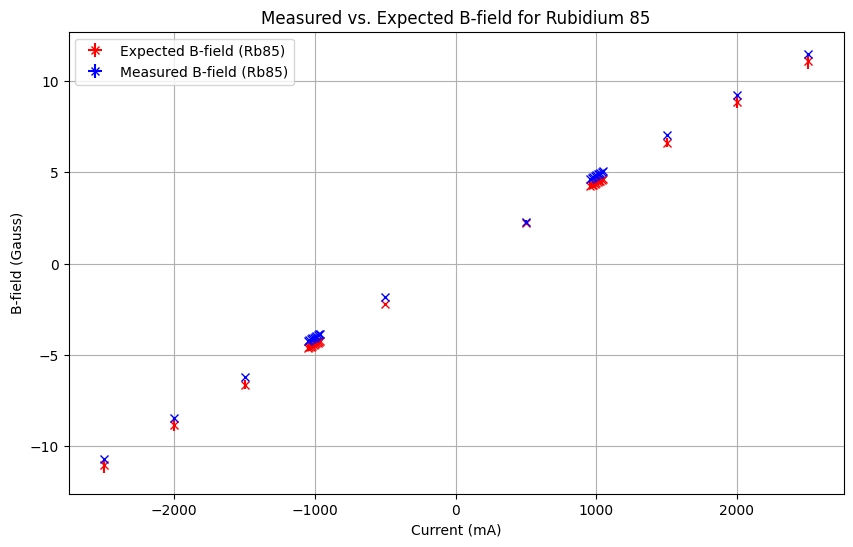

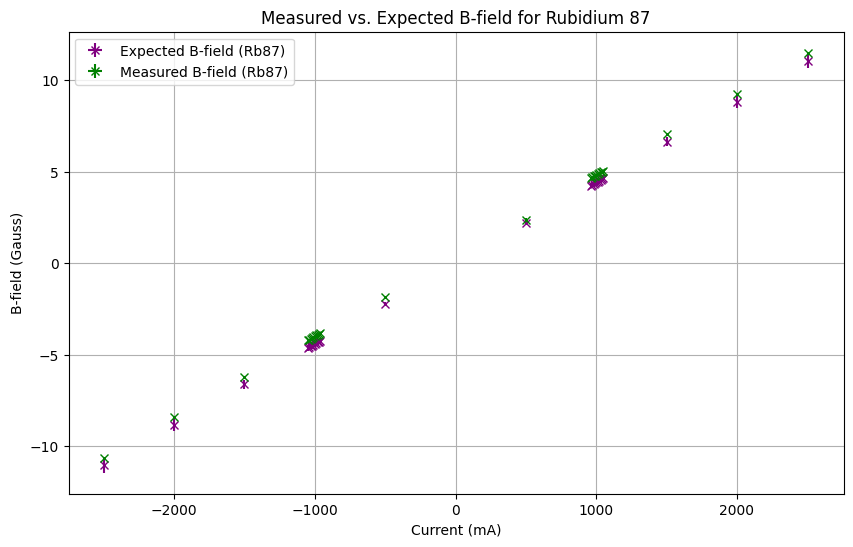

In [16]:
# Plotting the Measured and Expected B-fields for Rubidium 85
plt.figure(figsize=(10, 6))

# Rubidium 85 - Expected B-field
plt.errorbar(rb85_data['Current (mA)'], rb85_data['Expected B-field'], xerr=rb85_data['Current Error'], yerr=rb85_data['Expected B-field Error'], fmt='x', label='Expected B-field (Rb85)', color='red')

# Rubidium 85 - Measured B-field
plt.errorbar(rb85_data['Current (mA)'], rb85_data['Measured B-field'], xerr=rb85_data['Current Error'], yerr=rb85_data['Measured B-field Error'], fmt='x', label='Measured B-field (Rb85)', color='blue')

plt.xlabel('Current (mA)')
plt.ylabel('B-field (Gauss)')
plt.title('Measured vs. Expected B-field for Rubidium 85')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the Measured and Expected B-fields for Rubidium 87
plt.figure(figsize=(10, 6))

# Rubidium 87 - Expected B-field
plt.errorbar(rb87_data['Current (mA)'], rb87_data['Expected B-field'], xerr=rb87_data['Current Error'], yerr=rb87_data['Expected B-field Error'], fmt='x', label='Expected B-field (Rb87)', color='purple')

# Rubidium 87 - Measured B-field
plt.errorbar(rb87_data['Current (mA)'], rb87_data['Measured B-field'], xerr=rb87_data['Current Error'], yerr=rb87_data['Measured B-field Error'], fmt='x', label='Measured B-field (Rb87)', color='green')

plt.xlabel('Current (mA)')
plt.ylabel('B-field (Gauss)')
plt.title('Measured vs. Expected B-field for Rubidium 87')
plt.legend()
plt.grid(True)
plt.show()

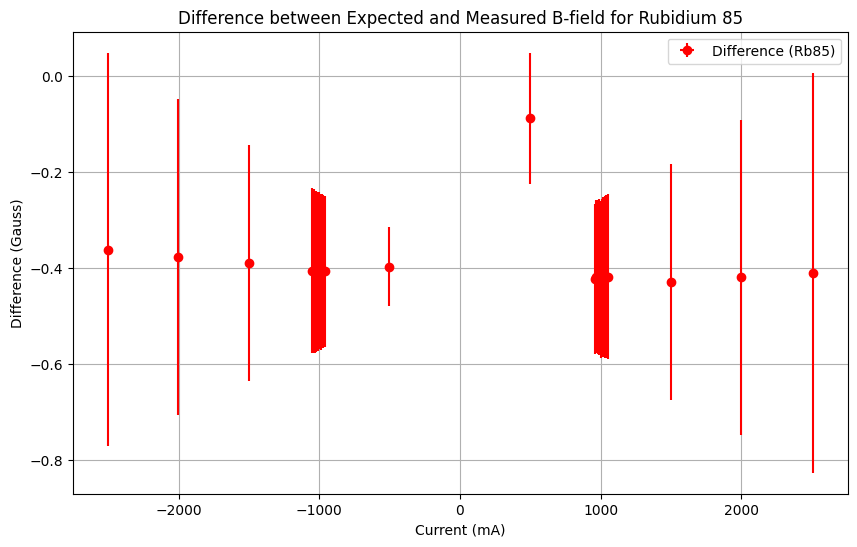

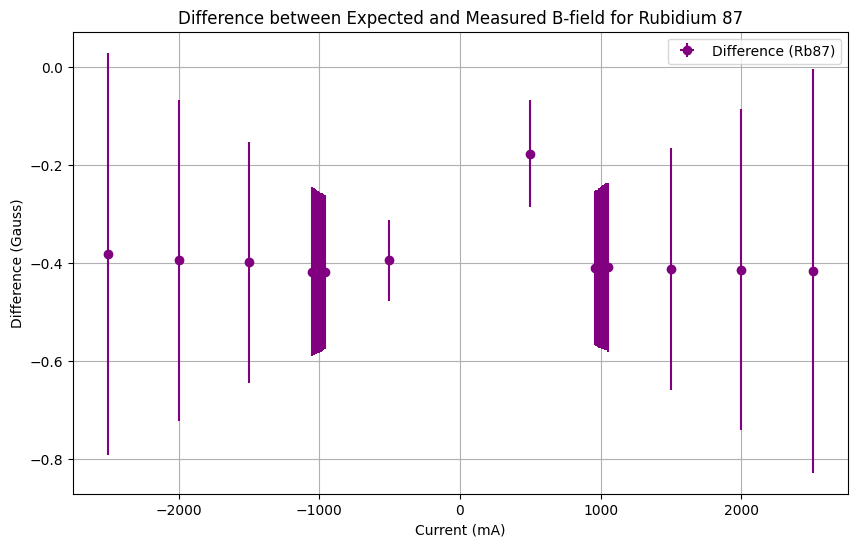

In [17]:
# Plotting the Difference between Expected and Measured B-fields for Rubidium 85
plt.figure(figsize=(10, 6))

# Rubidium 85 - Difference
plt.errorbar(rb85_data['Current (mA)'], 
             rb85_data['Expected B-field'] - rb85_data['Measured B-field'], xerr = rb85_data['Current Error'], 
             yerr=np.sqrt(rb85_data['Expected B-field Error']**2 + rb85_data['Measured B-field Error']**2), 
             fmt='o', label='Difference (Rb85)', color='red')

plt.xlabel('Current (mA)')
plt.ylabel('Difference (Gauss)')
plt.title('Difference between Expected and Measured B-field for Rubidium 85')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the Difference between Expected and Measured B-fields for Rubidium 87
plt.figure(figsize=(10, 6))

# Rubidium 87 - Difference
plt.errorbar(rb87_data['Current (mA)'], 
             rb87_data['Expected B-field'] - rb87_data['Measured B-field'], xerr = rb87_data['Current Error'],
             yerr=np.sqrt(rb87_data['Expected B-field Error']**2 + rb87_data['Measured B-field Error']**2), 
             fmt='o', label='Difference (Rb87)', color='purple')

plt.xlabel('Current (mA)')
plt.ylabel('Difference (Gauss)')
plt.title('Difference between Expected and Measured B-field for Rubidium 87')
plt.legend()
plt.grid(True)
plt.show()
